# DATA PROCESSES ASSIGNMENT

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from collections import defaultdict
from IPython.display import display

import statsmodels.api as sm


!pip install lifelines
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats
import scipy.stats as ss
import statistics

## Understand the business
Clearly define your business and note down the problem you are solving. Do a fundamental analysis on whether providing a data solution will add value to your customer and company or not.

TODO

In this regard,
you must consider univariate and bivariate analysis, survival curves (e.g.,
Kaplan–Meier), and any other analysis that may help to understand the survival
of a patient. You must also train and test different models to predict the
survival (the most important part of the technical execution is the previous
analysis though).



Steps in Data Exploration and Preprocessing:\
Identification of variables and data types\
Analyzing the basic metrics\
Non-Graphical Univariate Analysis\
Graphical Univariate Analysis\
Bivariate Analysis\
Variable transformations\
Missing value treatment\
Outlier treatment\
Correlation Analysis\
Dimensionality Reduction\

TODO
https://towardsai.net/p/data-analysis/exploratory-data-analysis-in-python-ebdf643a33f6

https://mode.com/blog/python-data-visualization-libraries/

## Data exploration
In this section shows the different types of analysis performed in order to understand how the data are organized and what varaibles are the most relevant for our analysis.
This section is divided in 4 parts:
- Identification of variables and data types
- Null values treatment and encoding (it is going to facilitate data exploration and we are going to obtain a better visualization of similar data that those that are going to be used in training and testing). We also delete destination variable (it have a lot of null values then is going to be an 'artificial' variable)
- Basic metrics
- Univariate analysis
- Bivaraite analysis
- Multivariate analysis

We see that initialy, the dataset has a column called ID (unuseful for us then we remove it).

In [401]:
filepath = "COVID19_data.csv"
df = pd.read_csv(filepath)
df

,ID,AGE,SEX,DAYS_HOSPITAL,DAYS_ICU,EXITUS,DESTINATION,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
0,1,15.0,FEMALE,4,0,NO,NaN,37.0,0,0,92,0,0
1,2,18.0,FEMALE,4,0,NO,ADMISSION,37.3,105,0,97,0,0
2,3,21.0,MALE,7,0,NO,NaN,38.5,112,0,95,85,47
3,4,21.0,MALE,10,0,NO,ADMISSION,39.2,113,0,97,0,0
4,5,22.0,MALE,4,0,NO,NaN,36.3,80,0,92,111,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,2050,189.0,FEMALE,11,3,NO,ADMISSION,0.0,0,0,0,0,0
2050,2051,NaN,FEMALE,3,0,NO,NaN,36.5,0,0,0,0,0
2051,2052,NaN,FEMALE,6,6,NO,NaN,36.8,190,0,98,0,0
2052,2053,NaN,MALE,5,0,NO,NaN,0.0,120,0,93,0,0


In [402]:
col_names = ["id", "age", "sex", "days_hospital", "days_icu", "exitus", "destination", "temp", "heart_rate", "glucose", "sat_o2", "blood_pres_sys", "blood_pres_dias"]
df = pd.read_csv(filepath, header=0, names=col_names).drop("id", axis=1)

### Identification of variables and data types
We identify the number of patients and the variables that we have and we take a look to the header and the end of the dataset to inspect it. We also identify the type of data that each variable has.

In [403]:
print(f"Number of patients: {df.shape[0]}")
print(f"Number of variables to study: {df.shape[1]}")
df.head(5)

Number of patients: 2054
Number of variables to study: 12


,age,sex,days_hospital,days_icu,exitus,destination,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
0,15.0,FEMALE,4,0,NO,NaN,37.0,0,0,92,0,0
1,18.0,FEMALE,4,0,NO,ADMISSION,37.3,105,0,97,0,0
2,21.0,MALE,7,0,NO,NaN,38.5,112,0,95,85,47
3,21.0,MALE,10,0,NO,ADMISSION,39.2,113,0,97,0,0
4,22.0,MALE,4,0,NO,NaN,36.3,80,0,92,111,70


In [404]:
df.tail(5)

,age,sex,days_hospital,days_icu,exitus,destination,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
2049,189.0,FEMALE,11,3,NO,ADMISSION,0.0,0,0,0,0,0
2050,NaN,FEMALE,3,0,NO,NaN,36.5,0,0,0,0,0
2051,NaN,FEMALE,6,6,NO,NaN,36.8,190,0,98,0,0
2052,NaN,MALE,5,0,NO,NaN,0.0,120,0,93,0,0
2053,NaN,MALE,3,0,NO,NaN,36.8,0,0,0,0,0


In [405]:
print(f"Data types in Covid-19 dataset: \n\n{df.dtypes}")

Data types in Covid-19 dataset: 

age                float64
sex                 object
days_hospital        int64
days_icu             int64
exitus              object
destination         object
temp               float64
heart_rate           int64
glucose              int64
sat_o2               int64
blood_pres_sys       int64
blood_pres_dias      int64
dtype: object


### Null values treatment and encoding
We identify null values and if we have null values in categorical variables we replace that null values by the most frequent values and transform it to numerical. The null values in numerical we repalce that nulls by the mean. We treat null values and we also encode categorical features here in order to visualizate the higher number of data as close as possible to the data we are going to use to train the model. 

In [406]:
print(df.isnull().any())

age                 True
sex                 True
days_hospital      False
days_icu           False
exitus              True
destination         True
temp               False
heart_rate         False
glucose            False
sat_o2             False
blood_pres_sys     False
blood_pres_dias    False
dtype: bool


In [407]:
# Categorical boolean mask
cat_mask = (df.dtypes == object)

# Filter categorical columns using mask and turn it into a list
cat_cols = df.columns[cat_mask].tolist()

df_cat = df[cat_cols]
df_num = df.drop(cat_cols, axis=1)

- Missing values in categorical features

In [408]:
imp_cat = SimpleImputer(strategy="most_frequent")
columns = df_cat.columns
index = df_cat.index
df_cat = pd.DataFrame(imp_cat.fit_transform(df_cat), columns=columns, index=index)
print(df_cat.isnull().any())

sex            False
exitus         False
destination    False
dtype: bool


In [409]:
d = defaultdict(preprocessing.LabelEncoder)
df_cat_le = df_cat.apply(lambda col: d[col.name].fit_transform(col))
print(df_cat_le)

      sex  exitus  destination
0       0       0            0
1       0       0            0
2       1       0            0
3       1       0            0
4       1       0            0
...   ...     ...          ...
2049    0       0            0
2050    0       0            0
2051    0       0            0
2052    1       0            0
2053    1       0            0

[2054 rows x 3 columns]


- Missing values in numerical features

In [410]:
imp_num = SimpleImputer(strategy="mean")
columns = df_num.columns
index = df_num.index
df_num = pd.DataFrame(imp_num.fit_transform(df_num), columns=columns, index=index)
print(df_num.isnull().any())

age                False
days_hospital      False
days_icu           False
temp               False
heart_rate         False
glucose            False
sat_o2             False
blood_pres_sys     False
blood_pres_dias    False
dtype: bool


In [411]:
df_preprocessed = pd.merge(left=df_cat_le, right=df_num, on=df.index).drop(["key_0","destination"], axis=1)
df_preprocessed.head(5)

,sex,exitus,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
0,0,0,15.0,4.0,0.0,37.0,0.0,0.0,92.0,0.0,0.0
1,0,0,18.0,4.0,0.0,37.3,105.0,0.0,97.0,0.0,0.0
2,1,0,21.0,7.0,0.0,38.5,112.0,0.0,95.0,85.0,47.0
3,1,0,21.0,10.0,0.0,39.2,113.0,0.0,97.0,0.0,0.0
4,1,0,22.0,4.0,0.0,36.3,80.0,0.0,92.0,111.0,70.0


In [412]:
df_preprocessed.tail(5)

,sex,exitus,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
2049,0,0,189.000000,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2050,0,0,70.856585,3.0,0.0,36.5,0.0,0.0,0.0,0.0,0.0
2051,0,0,70.856585,6.0,6.0,36.8,190.0,0.0,98.0,0.0,0.0
2052,1,0,70.856585,5.0,0.0,0.0,120.0,0.0,93.0,0.0,0.0
2053,1,0,70.856585,3.0,0.0,36.8,0.0,0.0,0.0,0.0,0.0


### Analyzing basic metrics
Observations:\
Minimum age people has is 15, maximum age people is 189 (it is an error we have to treat it) mean with average of 70.85, deviation 20.43.\
75% of the patients spend less than 10 days at the hospital and 25% spend less than 4 days.\
75% of the patiens are not entered in icu


In [413]:
df_preprocessed.describe()

,sex,exitus,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,0.598345,0.160175,70.856585,8.118793,0.355404,28.386319,70.787731,1.776047,73.397760,83.571568,48.328140
std,0.490352,0.366858,20.436992,6.177872,2.173721,15.419158,41.802038,20.434622,37.863716,67.450853,44.225438
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,57.000000,4.000000,0.000000,35.400000,63.000000,0.000000,81.000000,0.000000,0.000000
50%,1.000000,0.000000,68.000000,7.000000,0.000000,36.400000,84.000000,0.000000,93.000000,115.000000,64.000000
75%,1.000000,0.000000,98.000000,10.000000,0.000000,36.900000,98.000000,0.000000,96.000000,137.000000,79.000000
max,1.000000,1.000000,189.000000,98.000000,36.000000,40.100000,593.000000,448.000000,99.000000,772.000000,845.000000


### Univariate analysis
Analysis done based only on one variable.

#### Histograms

We can observe that we have people of all ages (10 to 105), highlighting a very importatn number of people between age ranges of 50-75. Also the most numerous group of people has an age range between 98-100 years.

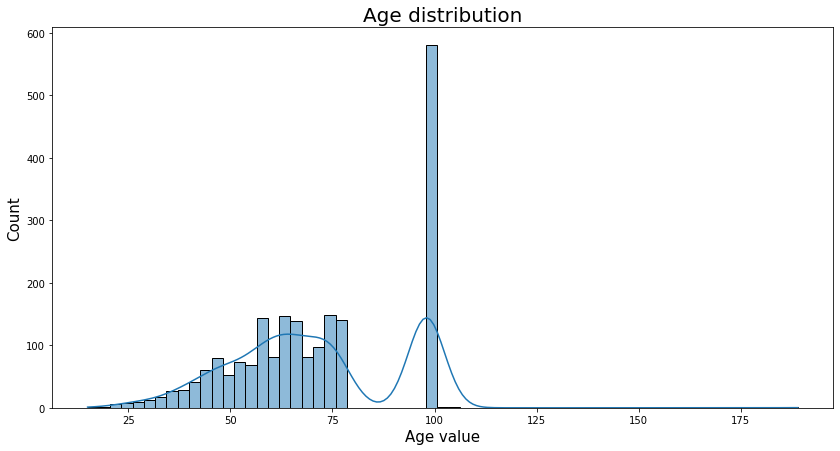

In [414]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["age"], bins=len(df_preprocessed["age"].unique()), kde=True)
plt.title('Age distribution', fontsize=20) 
plt.xlabel('Age value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

Regarding days at hospital we can say that the majority of the patiens spend 2.5-10 days at the hospital. Only a very low number of people spend more than 20 days at the hospital.

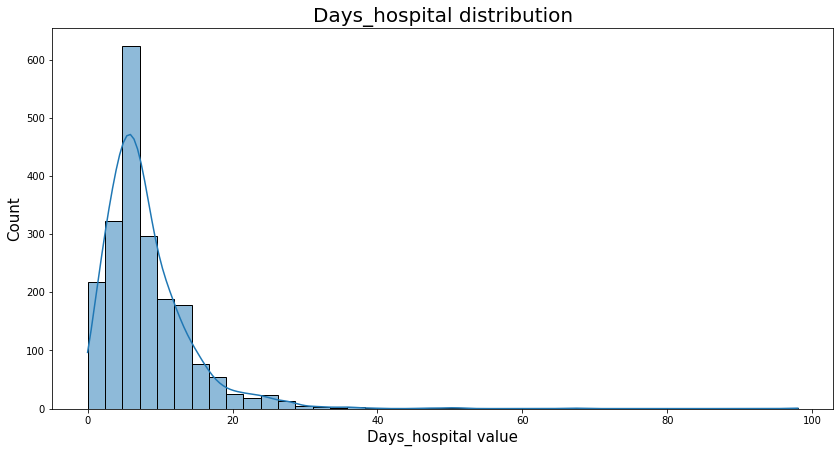

In [415]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["days_hospital"], bins=len(df_preprocessed["days_hospital"].unique()), kde=True)
plt.title('Days_hospital distribution', fontsize=20) 
plt.xlabel('Days_hospital value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

As we can see most of the people stay 0-2 days at the ICU. But we can appreciate also that some people spend 4-6, 8-9, 15-17 days at ICU but is derisory.

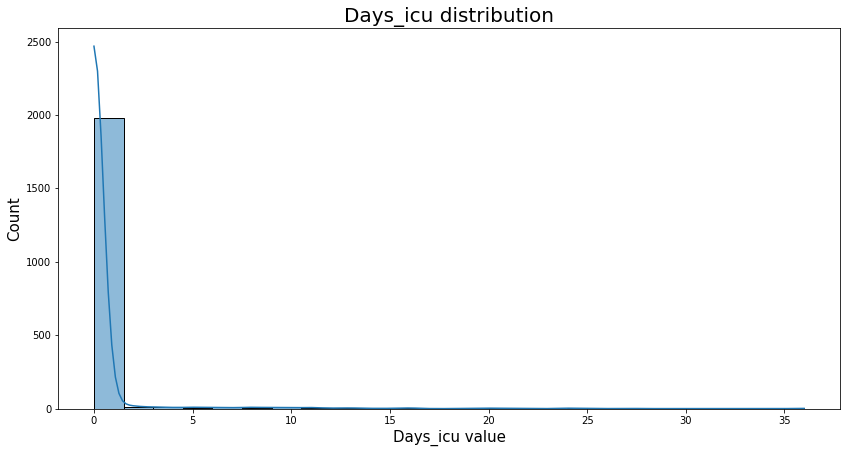

In [416]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["days_icu"], bins=len(df_preprocessed["days_icu"].unique()), kde=True)
plt.title('Days_icu distribution', fontsize=20) 
plt.xlabel('Days_icu value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

We can see that the majority of the data are located between the range 35-40. Also we can appreciate that 480 persons has temp=0 this is possibly an outliers/anomaly and must be treatened. 

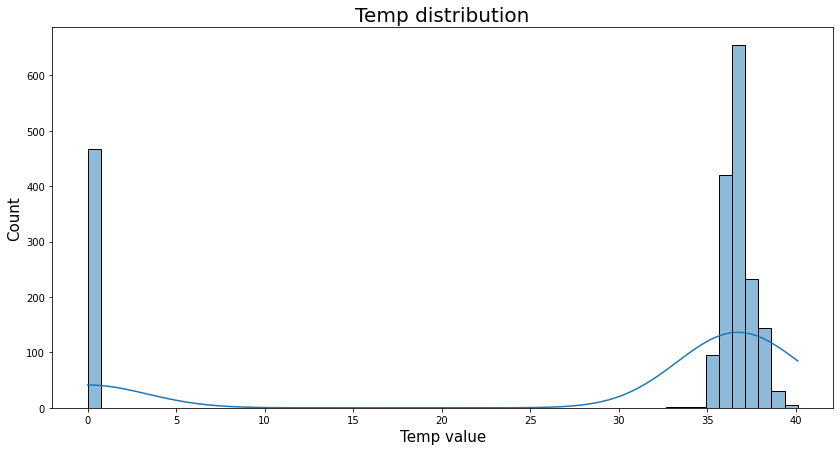

In [417]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["temp"], bins=len(df_preprocessed["temp"].unique()), kde=True)
plt.title('Temp distribution', fontsize=20) 
plt.xlabel('Temp value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

The data follow a normal distribution in range 50-150. Also we can appreciate patiens with Heart_rate equal to 0 which is indicate an outlier.

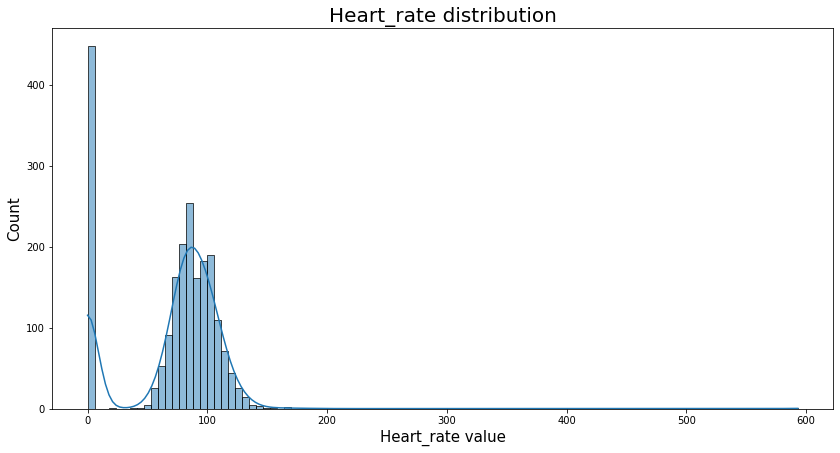

In [418]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["heart_rate"], bins=len(df_preprocessed["heart_rate"].unique()), kde=True)
plt.title('Heart_rate distribution', fontsize=20) 
plt.xlabel('Heart_rate value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

Almost all the data are located in the range of 0-20

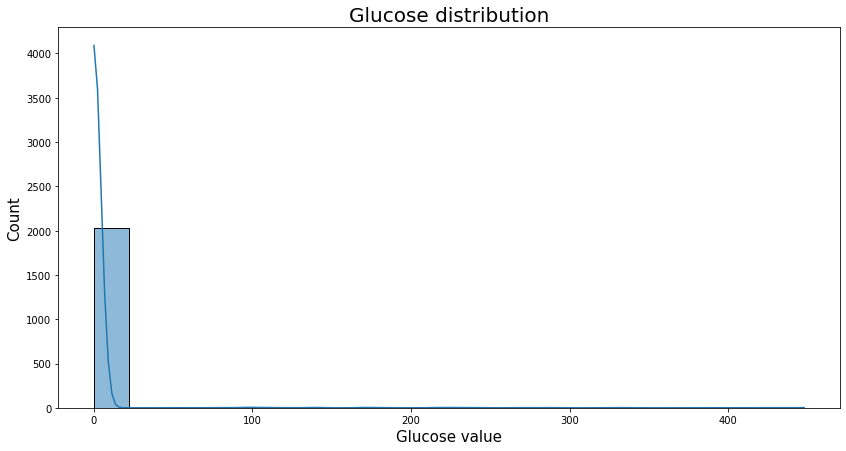

In [419]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["glucose"], bins=len(df_preprocessed["glucose"].unique()), kde=True)
plt.title('Glucose distribution', fontsize=20) 
plt.xlabel('Glucose value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

Like in other variables, we have a big number of data in range 0-1. In spite of this the majority of the data are located in range 80-100.

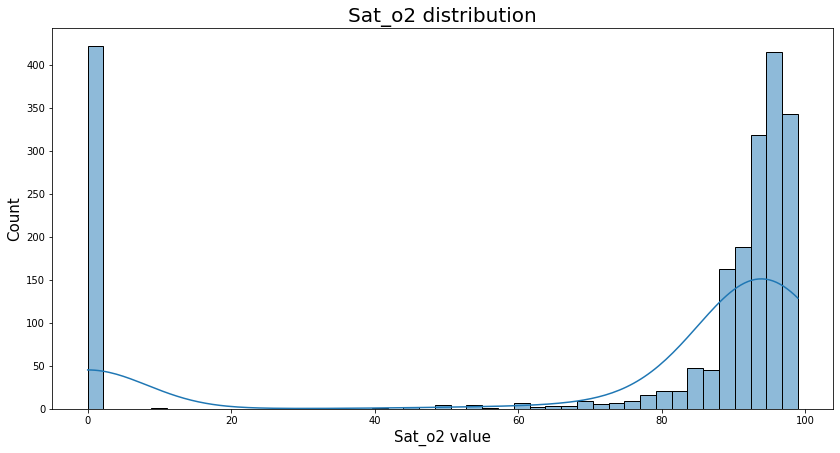

In [420]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["sat_o2"], bins=len(df_preprocessed["sat_o2"].unique()), kde=True)
plt.title('Sat_o2 distribution', fontsize=20) 
plt.xlabel('Sat_o2 value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

In the case of blood_pres_sys and blood_pres_dias a very large number of data has the value 0. But in both cases the data follow a normal distribution.

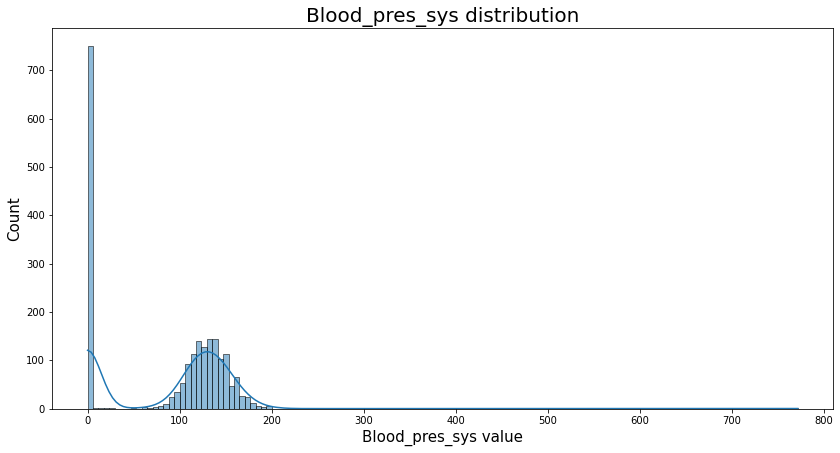

In [421]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["blood_pres_sys"], bins=len(df_preprocessed["blood_pres_sys"].unique()), kde=True)
plt.title('Blood_pres_sys distribution', fontsize=20) 
plt.xlabel('Blood_pres_sys value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

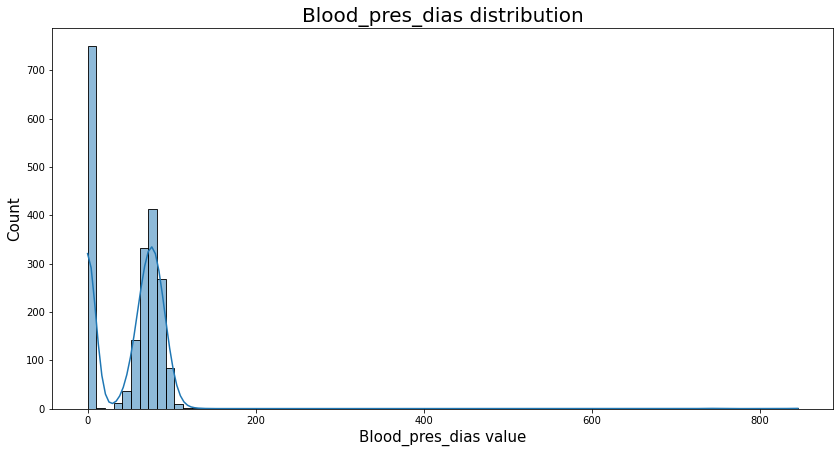

In [422]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["blood_pres_dias"], bins=len(df_preprocessed["blood_pres_dias"].unique()), kde=True)
plt.title('Blood_pres_dias distribution', fontsize=20) 
plt.xlabel('Blood_pres_dias value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

#### Bar graph

Here we can see that we have more patients male than female

/home/rafael/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


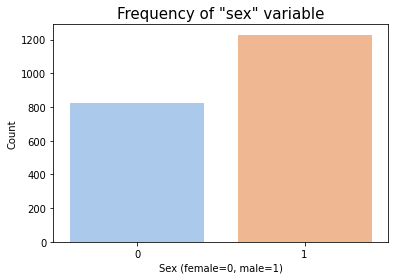

In [423]:
sns.countplot(df_preprocessed["sex"], palette=sns.color_palette("pastel"))
plt.title('Frequency of "sex" variable', fontsize=15) 
plt.xlabel('Sex (female=0, male=1)', fontsize=10) 
plt.ylabel('Count', fontsize=10) 
plt.show()

Te majority of the patients die 

/home/rafael/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


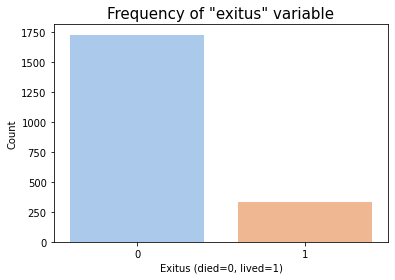

In [424]:
sns.countplot(df_preprocessed["exitus"], palette=sns.color_palette("pastel"))
plt.title('Frequency of "exitus" variable', fontsize=15) 
plt.xlabel('Exitus (died=0, lived=1)', fontsize=10) 
plt.ylabel('Count', fontsize=10) 
plt.show()

#### Box-plot

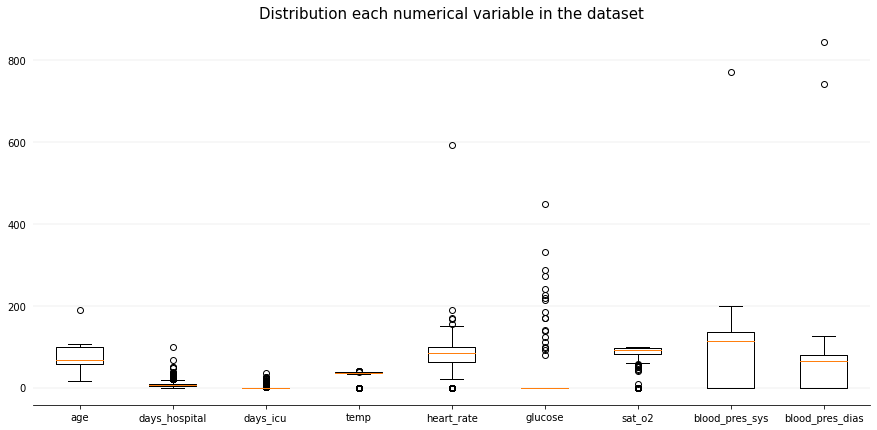

In [425]:
fig, ax = plt.subplots(figsize=(15, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution each numerical variable in the dataset', fontsize=15)

dataset = [df_preprocessed["age"], df_preprocessed["days_hospital"], df_preprocessed["days_icu"], df_preprocessed["temp"], df_preprocessed["heart_rate"], df_preprocessed["glucose"], df_preprocessed["sat_o2"], df_preprocessed["blood_pres_sys"], df_preprocessed["blood_pres_dias"]]
labels = ["age", "days_hospital", "days_icu", "temp", "heart_rate", "glucose", "sat_o2", "blood_pres_sys", "blood_pres_dias"]
ax.boxplot(dataset, labels=labels)
plt.show()

#### CDF (cumulative distributive function) and PDF (probability density function)

If we draw a straight line from Age value at 80, then it intersects the curve Cumulative distribution function(yellow) at a value approximately equal to 0.75 i.e there are 75% people from a cumulative sum of 20 to 80 age.

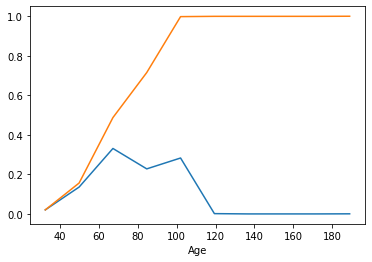

In [426]:
counts, bin_edges = np.histogram(df_preprocessed["age"], bins=10, density=True)

plt.xlabel("Age")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

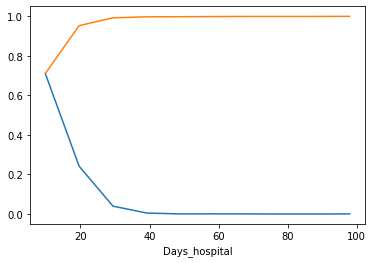

In [427]:
counts, bin_edges = np.histogram(df_preprocessed["days_hospital"], bins=10, density=True)

plt.xlabel("Days_hospital")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

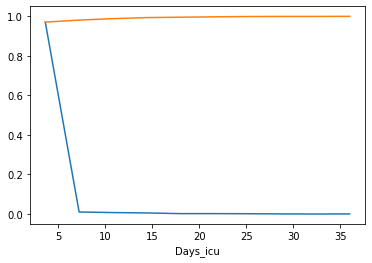

In [428]:
counts, bin_edges = np.histogram(df_preprocessed["days_icu"], bins=10, density=True)

plt.xlabel("Days_icu")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

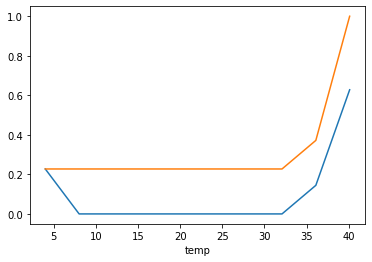

In [429]:
counts, bin_edges = np.histogram(df_preprocessed["temp"], bins=10, density=True)

plt.xlabel("temp")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

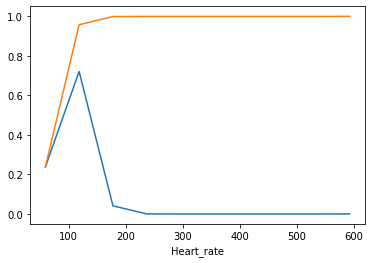

In [430]:
counts, bin_edges = np.histogram(df_preprocessed["heart_rate"], bins=10, density=True)

plt.xlabel("Heart_rate")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

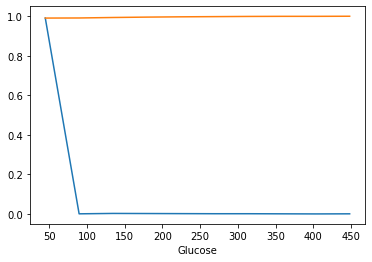

In [431]:
counts, bin_edges = np.histogram(df_preprocessed["glucose"], bins=10, density=True)

plt.xlabel("Glucose")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

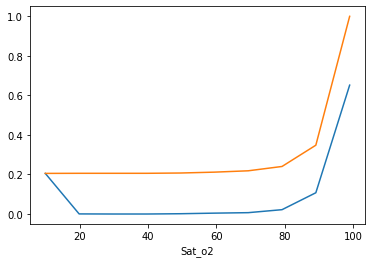

In [432]:
counts, bin_edges = np.histogram(df_preprocessed["sat_o2"], bins=10, density=True)

plt.xlabel("Sat_o2")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

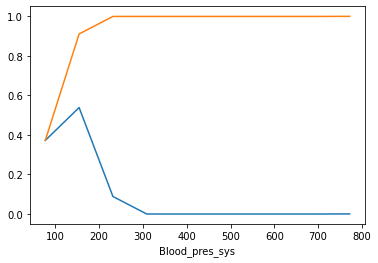

In [433]:
counts, bin_edges = np.histogram(df_preprocessed["blood_pres_sys"], bins=10, density=True)

plt.xlabel("Blood_pres_sys")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf) 
plt.show()

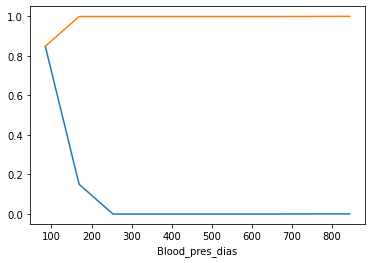

In [434]:
counts, bin_edges = np.histogram(df_preprocessed["blood_pres_dias"], bins=10, density=True)

plt.xlabel("Blood_pres_dias")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

### Bivariate analysis

In [435]:
print("Correlation matrix")
df_preprocessed.corr()

Correlation matrix


,sex,exitus,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
sex,1.000000,0.051838,-0.119474,0.067694,0.059960,0.010644,0.016608,0.006914,-0.001308,0.011245,0.015739
exitus,0.051838,1.000000,0.380007,-0.006680,0.146640,-0.032739,-0.017189,0.002188,-0.064693,0.036927,0.006846
age,-0.119474,0.380007,1.000000,0.042006,-0.032029,0.016650,-0.063414,0.003039,0.028541,0.114074,0.052272
days_hospital,0.067694,-0.006680,0.042006,1.000000,0.348364,-0.038066,-0.026610,-0.014042,-0.058222,-0.000978,0.008937
days_icu,0.059960,0.146640,-0.032029,0.348364,1.000000,-0.057480,-0.036581,-0.011728,-0.083945,-0.028983,-0.024658
temp,0.010644,-0.032739,0.016650,-0.038066,-0.057480,1.000000,0.742506,0.032950,0.841005,0.531313,0.473725
heart_rate,0.016608,-0.017189,-0.063414,-0.026610,-0.036581,0.742506,1.000000,0.028040,0.789945,0.524052,0.485434
glucose,0.006914,0.002188,0.003039,-0.014042,-0.011728,0.032950,0.028040,1.000000,0.036247,0.039495,0.025423
sat_o2,-0.001308,-0.064693,0.028541,-0.058222,-0.083945,0.841005,0.789945,0.036247,1.000000,0.558156,0.495471
blood_pres_sys,0.011245,0.036927,0.114074,-0.000978,-0.028983,0.531313,0.524052,0.039495,0.558156,1.000000,0.813789


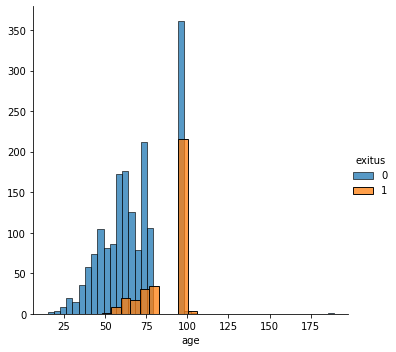

In [436]:
sns.FacetGrid(df_preprocessed, hue="exitus", height=5).map(sns.histplot, "age").add_legend()
plt.show()

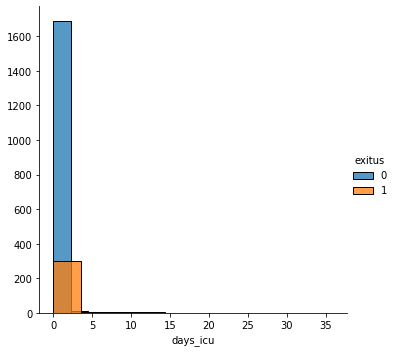

In [437]:
sns.FacetGrid(df_preprocessed, hue="exitus", height=5).map(sns.histplot, "days_icu").add_legend()
plt.show()

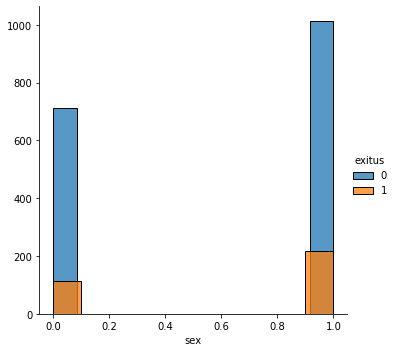

In [438]:
sns.FacetGrid(df_preprocessed, hue="exitus", height=5).map(sns.histplot, "sex").add_legend()
plt.show()

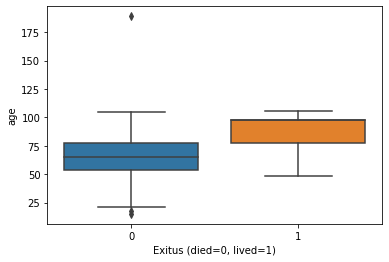

In [439]:
sns.boxplot(x="exitus", y="age", data=df_preprocessed)
plt.xlabel('Exitus (died=0, lived=1)', fontsize=10) 
plt.show()

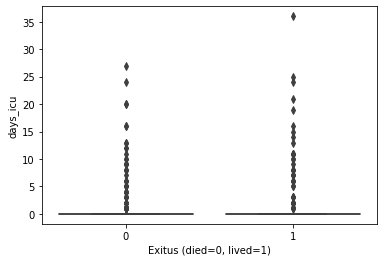

In [440]:
sns.boxplot(x="exitus", y="days_icu", data=df_preprocessed)
plt.xlabel('Exitus (died=0, lived=1)', fontsize=10) 
plt.show()

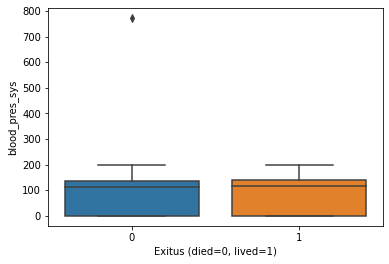

In [441]:
sns.boxplot(x="exitus", y="blood_pres_sys", data=df_preprocessed)
plt.xlabel('Exitus (died=0, lived=1)', fontsize=10) 
plt.show()

### Multivariate analysis

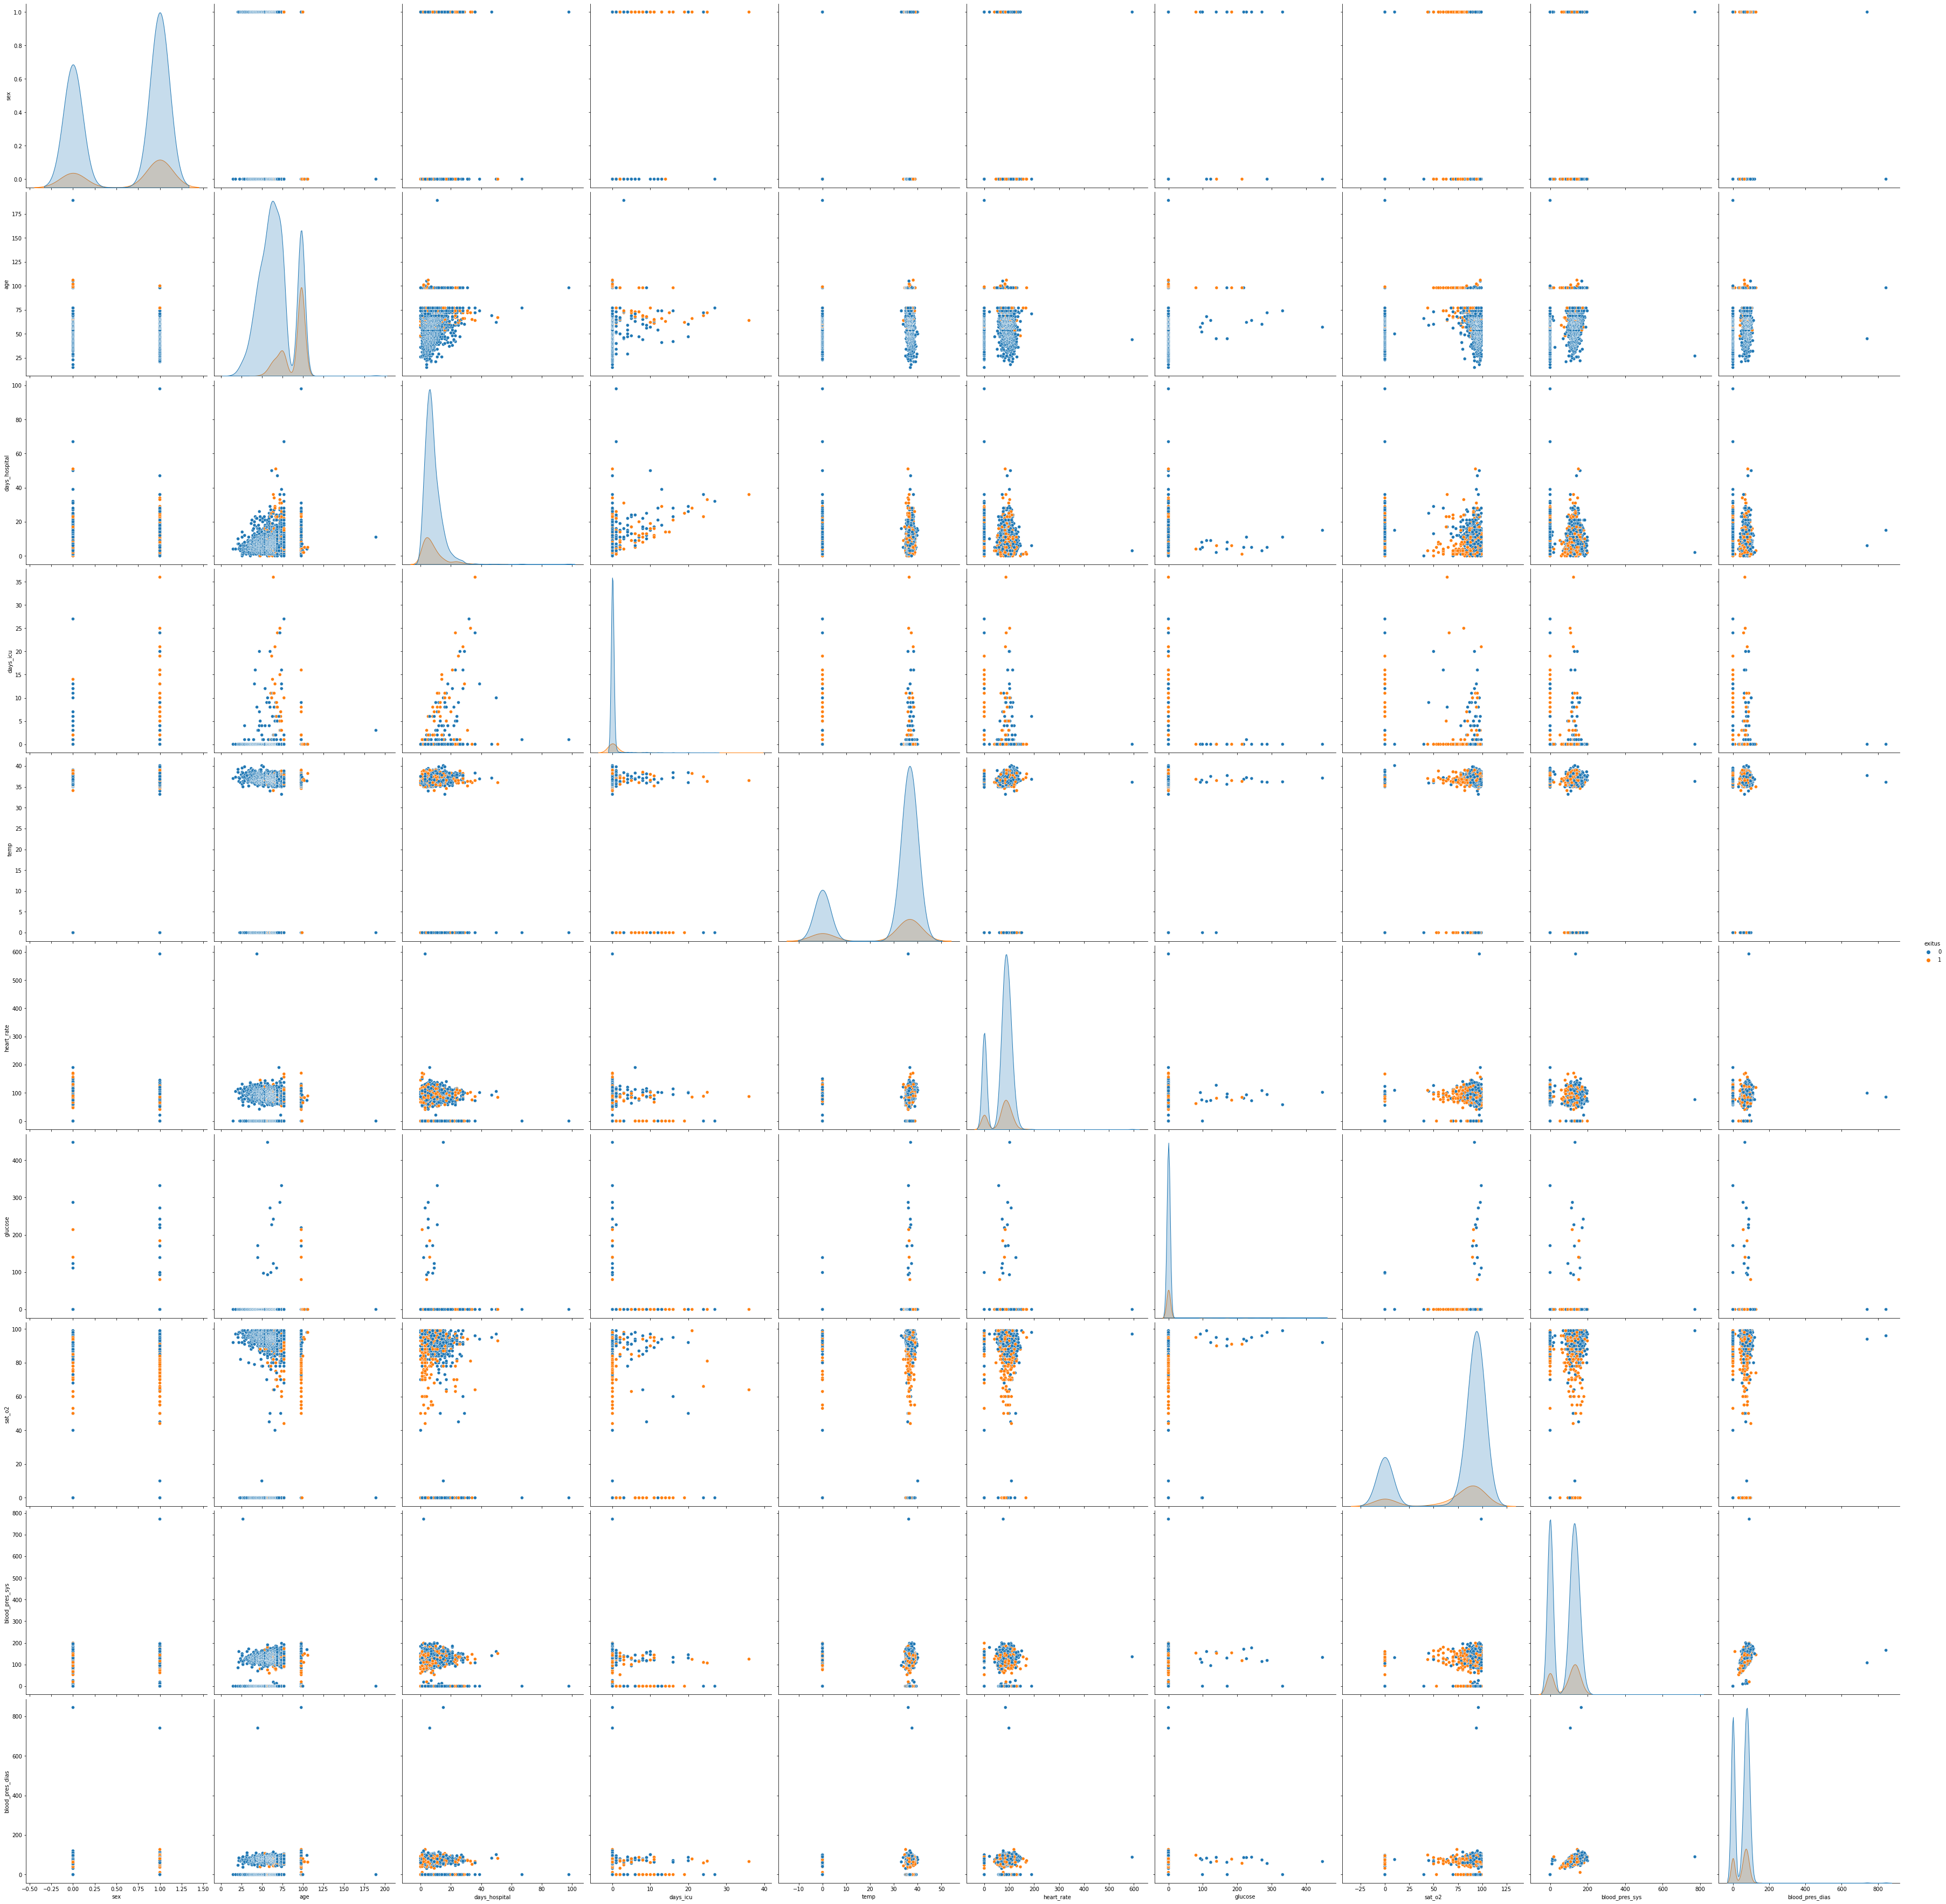

In [442]:
sns.pairplot(df_preprocessed, hue="exitus", height=5)
plt.show()

## Data preparation
As can be seen in the anlysis realized in the last section we have to do some transformations in our data in order to be useful for us in order to predict the survival of a patient:
- Apply one-hot encoding to categorical variables (sex, exitus) encoded in the previous section
- Treat 0 values in some variables (temp, heart_rate, glucose, sat_o2, blood_pres_sys, blood_pres_dias)
- Treat 'strange' values (i.e age=189) in some variables (age, heart_rate, blood_pres_sys, blood_pres_dias)

### One-hot encoding to 'sex' and 'exitus'

In [443]:
ohe = preprocessing.OneHotEncoder(sparse=False)
df_cat_ohe = pd.DataFrame(ohe.fit_transform(df_cat), 
                                       columns=ohe.get_feature_names(df_cat.columns.tolist()),
                                       index=df_cat.index).drop("destination_ADMISSION", axis=1)
df_cat_ohe

,sex_FEMALE,sex_MALE,exitus_NO,exitus_YES
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
2049,1.0,0.0,1.0,0.0
2050,1.0,0.0,1.0,0.0
2051,1.0,0.0,1.0,0.0
2052,0.0,1.0,1.0,0.0


In [444]:
df_preprocessed_ohe = df_preprocessed.drop(["sex", "exitus"], axis=1)
df_preprocessed_ohe

,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
0,15.000000,4.0,0.0,37.0,0.0,0.0,92.0,0.0,0.0
1,18.000000,4.0,0.0,37.3,105.0,0.0,97.0,0.0,0.0
2,21.000000,7.0,0.0,38.5,112.0,0.0,95.0,85.0,47.0
3,21.000000,10.0,0.0,39.2,113.0,0.0,97.0,0.0,0.0
4,22.000000,4.0,0.0,36.3,80.0,0.0,92.0,111.0,70.0
...,...,...,...,...,...,...,...,...,...
2049,189.000000,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2050,70.856585,3.0,0.0,36.5,0.0,0.0,0.0,0.0,0.0
2051,70.856585,6.0,6.0,36.8,190.0,0.0,98.0,0.0,0.0
2052,70.856585,5.0,0.0,0.0,120.0,0.0,93.0,0.0,0.0


In [445]:
df_preprocessed_ohe = pd.merge(left=df_cat_ohe, right=df_preprocessed, on=df.index).drop(["key_0", "sex", "exitus"], axis=1)
df_preprocessed_ohe.head(5)

,sex_FEMALE,sex_MALE,exitus_NO,exitus_YES,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
0,1.0,0.0,1.0,0.0,15.0,4.0,0.0,37.0,0.0,0.0,92.0,0.0,0.0
1,1.0,0.0,1.0,0.0,18.0,4.0,0.0,37.3,105.0,0.0,97.0,0.0,0.0
2,0.0,1.0,1.0,0.0,21.0,7.0,0.0,38.5,112.0,0.0,95.0,85.0,47.0
3,0.0,1.0,1.0,0.0,21.0,10.0,0.0,39.2,113.0,0.0,97.0,0.0,0.0
4,0.0,1.0,1.0,0.0,22.0,4.0,0.0,36.3,80.0,0.0,92.0,111.0,70.0


In [446]:
df_preprocessed_ohe.describe()

,sex_FEMALE,sex_MALE,exitus_NO,exitus_YES,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,0.401655,0.598345,0.839825,0.160175,70.856585,8.118793,0.355404,28.386319,70.787731,1.776047,73.397760,83.571568,48.328140
std,0.490352,0.490352,0.366858,0.366858,20.436992,6.177872,2.173721,15.419158,41.802038,20.434622,37.863716,67.450853,44.225438
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,57.000000,4.000000,0.000000,35.400000,63.000000,0.000000,81.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,68.000000,7.000000,0.000000,36.400000,84.000000,0.000000,93.000000,115.000000,64.000000
75%,1.000000,1.000000,1.000000,0.000000,98.000000,10.000000,0.000000,36.900000,98.000000,0.000000,96.000000,137.000000,79.000000
max,1.000000,1.000000,1.000000,1.000000,189.000000,98.000000,36.000000,40.100000,593.000000,448.000000,99.000000,772.000000,845.000000


### Treat 0 values and 'strange' values
temp -> 0's = mean\
heart_rate -> 0's = mean | existe un valor 600 sustituyelo por el ams alto\
glucose -> 0's = mean\
sat_02 -> 0's mean\
blood_pres_sys -> 0's = mean | existe valor cercano a 800 sustituyelo por al media\
blood_pres_dias -> 0's = mean | esiste valor cercano  a 800 y otro a 700 sustituyelo por la media

In [447]:
df_preprocessed_ohe["age"] = df_preprocessed_ohe["age"].replace(df_preprocessed_ohe["age"].max(), 106) # We replace this strange value by the next max age

In [448]:
df_preprocessed_ohe["temp"] = df_preprocessed_ohe["temp"].replace(0, df_preprocessed_ohe["temp"].median())

In [449]:
df_preprocessed_ohe["heart_rate"] = df_preprocessed_ohe["heart_rate"].replace(df_preprocessed_ohe["heart_rate"].max(), df_preprocessed_ohe["heart_rate"].median()) # We replace this strange value by the median(84.0) whis is considered a normal heart rate

In [450]:
df_preprocessed_ohe["heart_rate"] = df_preprocessed_ohe["heart_rate"].replace(0, df_preprocessed_ohe["heart_rate"].median())

In [451]:
df_preprocessed_ohe["sat_o2"] = df_preprocessed_ohe["sat_o2"].replace(0, df_preprocessed_ohe["sat_o2"].mean())

In [452]:
df_preprocessed_ohe["blood_pres_sys"] = df_preprocessed_ohe["blood_pres_sys"].replace(df_preprocessed_ohe["blood_pres_sys"].max(), df_preprocessed_ohe["blood_pres_sys"].median()) 

In [453]:
df_preprocessed_ohe["blood_pres_sys"] = df_preprocessed_ohe["blood_pres_sys"].replace(0, df_preprocessed_ohe["blood_pres_sys"].median())

In [454]:
df_preprocessed_ohe["blood_pres_dias"] = df_preprocessed_ohe["blood_pres_dias"].replace(df_preprocessed_ohe["blood_pres_dias"].max(), df_preprocessed_ohe["blood_pres_dias"].median()) 

In [455]:
df_preprocessed_ohe["blood_pres_dias"] = df_preprocessed_ohe["blood_pres_dias"].replace(df_preprocessed_ohe["blood_pres_dias"].max(), df_preprocessed_ohe["blood_pres_dias"].median()) 

In [456]:
df_preprocessed_ohe["blood_pres_dias"] = df_preprocessed_ohe["blood_pres_dias"].replace(0, df_preprocessed_ohe["blood_pres_dias"].median())

In [457]:
df_preprocessed_ohe.drop("glucose", axis=1)

,sex_FEMALE,sex_MALE,exitus_NO,exitus_YES,age,days_hospital,days_icu,temp,heart_rate,sat_o2,blood_pres_sys,blood_pres_dias
0,1.0,0.0,1.0,0.0,15.000000,4.0,0.0,37.0,84.0,92.00000,115.0,64.0
1,1.0,0.0,1.0,0.0,18.000000,4.0,0.0,37.3,105.0,97.00000,115.0,64.0
2,0.0,1.0,1.0,0.0,21.000000,7.0,0.0,38.5,112.0,95.00000,85.0,47.0
3,0.0,1.0,1.0,0.0,21.000000,10.0,0.0,39.2,113.0,97.00000,115.0,64.0
4,0.0,1.0,1.0,0.0,22.000000,4.0,0.0,36.3,80.0,92.00000,111.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2049,1.0,0.0,1.0,0.0,106.000000,11.0,3.0,36.4,84.0,73.39776,115.0,64.0
2050,1.0,0.0,1.0,0.0,70.856585,3.0,0.0,36.5,84.0,73.39776,115.0,64.0
2051,1.0,0.0,1.0,0.0,70.856585,6.0,6.0,36.8,190.0,98.00000,115.0,64.0
2052,0.0,1.0,1.0,0.0,70.856585,5.0,0.0,36.4,120.0,93.00000,115.0,64.0


## Survival analysis 

In [458]:
df_preprocessed = df_preprocessed.drop(["glucose"], axis=1) # This column only has 19 correct values
df_preprocessed["age"] = df_preprocessed["age"].replace(df_preprocessed["age"].max(), 106) # We replace this strange value by the next max age
df_preprocessed["temp"] = df_preprocessed["temp"].replace(0, df_preprocessed["temp"].median())
df_preprocessed["heart_rate"] = df_preprocessed["heart_rate"].replace(df_preprocessed["heart_rate"].max(), df_preprocessed["heart_rate"].median()) # We replace this strange value by the median(84.0) whis is considered a normal heart rate
df_preprocessed["heart_rate"] = df_preprocessed["heart_rate"].replace(0, df_preprocessed["heart_rate"].median())
df_preprocessed["sat_o2"] = df_preprocessed["sat_o2"].replace(0, df_preprocessed["sat_o2"].mean())
df_preprocessed["blood_pres_sys"] = df_preprocessed["blood_pres_sys"].replace(df_preprocessed["blood_pres_sys"].max(), df_preprocessed["blood_pres_sys"].median()) 
df_preprocessed["blood_pres_sys"] = df_preprocessed["blood_pres_sys"].replace(0, df_preprocessed["blood_pres_sys"].median())
df_preprocessed["blood_pres_dias"] = df_preprocessed["blood_pres_dias"].replace(df_preprocessed["blood_pres_dias"].max(), df_preprocessed["blood_pres_dias"].median()) 
df_preprocessed["blood_pres_dias"] = df_preprocessed["blood_pres_dias"].replace(df_preprocessed["blood_pres_dias"].max(), df_preprocessed["blood_pres_dias"].median()) 
df_preprocessed["blood_pres_dias"] = df_preprocessed["blood_pres_dias"].replace(0, df_preprocessed["blood_pres_dias"].median())

In [459]:
# df_preprocessed["exitus"] = df_preprocessed["exitus"].replace(0, -1) # We replace this strange value by the median(84.0) whis is considered a normal heart rate
# df_preprocessed["exitus"] = df_preprocessed["exitus"].replace(1, 0) # We replace this strange value by the median(84.0) whis is considered a normal heart rate
# df_preprocessed["exitus"] = df_preprocessed["exitus"].replace(-1, 1) # We replace this strange value by the median(84.0) whis is considered a normal heart rate


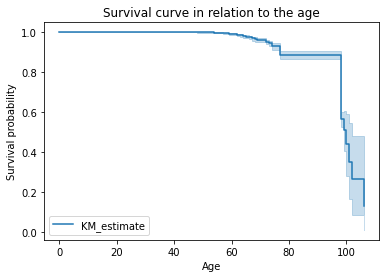

In [496]:
kmf = KaplanMeierFitter()
x = df_preprocessed['age']
y = df_preprocessed['exitus']
kmf.fit(x, event_observed = y)
kmf.plot_survival_function()
plt.title("Survival curve in relation to the age")
plt.xlabel("Age")
plt.ylabel("Survival probability")
plt.show()

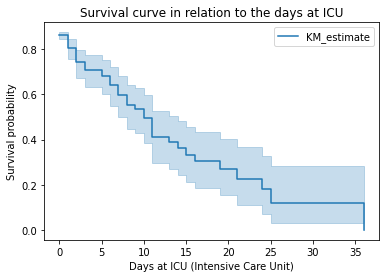

In [492]:
kmf = KaplanMeierFitter()
x = df_preprocessed['days_icu']
y = df_preprocessed['exitus']
kmf.fit(x, event_observed = y)
kmf.plot_survival_function()
plt.title("Survival curve in relation to the days at ICU")
plt.xlabel("Days at ICU (Intensive Care Unit)")
plt.ylabel("Survival probability")
plt.show()

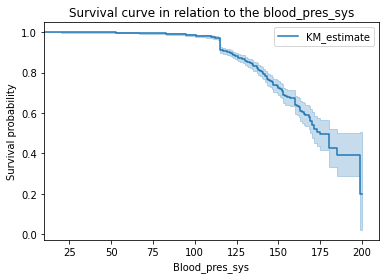

In [483]:
kmf = KaplanMeierFitter()
x = df_preprocessed['blood_pres_sys']
y = df_preprocessed['exitus']
kmf.fit(x, event_observed = y)
kmf.plot_survival_function()
plt.title("Survival curve in relation to the blood_pres_sys")
plt.xlabel("Blood_pres_sys")
plt.xlim([df_preprocessed['blood_pres_sys'].min(), df_preprocessed['blood_pres_sys'].max()+10])
plt.ylabel("Survival probability")
plt.show()

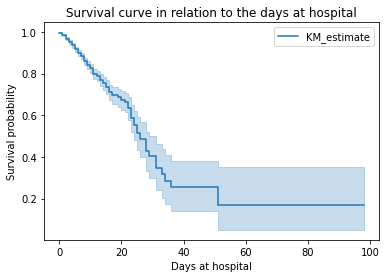

In [484]:
kmf = KaplanMeierFitter()
x = df_preprocessed['days_hospital']
y = df_preprocessed['exitus']
kmf.fit(x, event_observed = y)
kmf.plot_survival_function()
plt.title("Survival curve in relation to the days at hospital")
plt.xlabel("Days at hospital")
plt.ylabel("Survival probability")
plt.show()

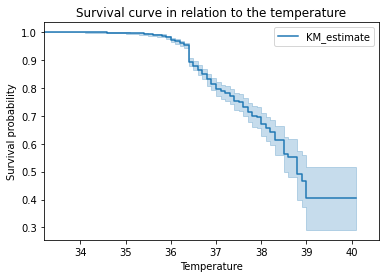

In [485]:
kmf = KaplanMeierFitter()
x = df_preprocessed['temp']
y = df_preprocessed['exitus']
kmf.fit(x, event_observed = y)
kmf.plot_survival_function()
plt.title("Survival curve in relation to the temperature")
plt.xlabel("Temperature")
plt.xlim([df_preprocessed['temp'].min(), df_preprocessed['temp'].max()+0.5])
plt.ylabel("Survival probability")
plt.show()

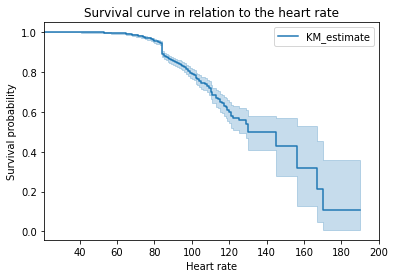

In [486]:
kmf = KaplanMeierFitter()
x = df_preprocessed['heart_rate']
y = df_preprocessed['exitus']
kmf.fit(x, event_observed = y)
kmf.plot_survival_function()
plt.title("Survival curve in relation to the heart rate")
plt.xlabel("Heart rate")
plt.xlim([df_preprocessed['heart_rate'].min(), df_preprocessed['heart_rate'].max()+10])
plt.ylabel("Survival probability")
plt.show()

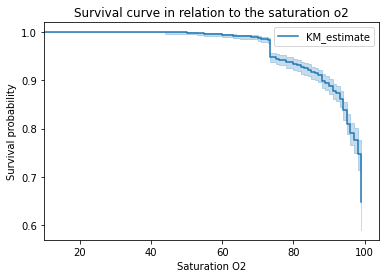

In [490]:
kmf = KaplanMeierFitter()
x = df_preprocessed['sat_o2']
y = df_preprocessed['exitus']
kmf.fit(x, event_observed = y)
kmf.plot_survival_function()
plt.title("Survival curve in relation to the saturation o2")
plt.xlabel("Saturation O2")
plt.xlim([df_preprocessed['sat_o2'].min(), df_preprocessed['sat_o2'].max()+5])
plt.ylabel("Survival probability")
plt.show()

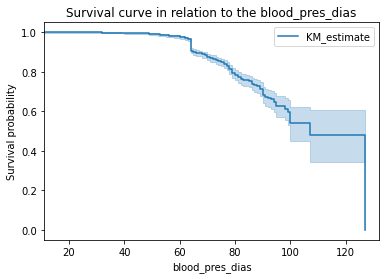

In [488]:
kmf = KaplanMeierFitter()
x = df_preprocessed['blood_pres_dias']
y = df_preprocessed['exitus']
kmf.fit(x, event_observed = y)
kmf.plot_survival_function()
plt.title("Survival curve in relation to the blood_pres_dias")
plt.xlabel("blood_pres_dias")
plt.xlim([df_preprocessed['blood_pres_dias'].min(), df_preprocessed['blood_pres_dias'].max()+5])
plt.ylabel("Survival probability")
plt.show()

 https://purnasaigudikandula.medium.com/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

## Data problem research
Define your data problem and see if there are readily available solutions to it by service providers like Google Cloud, AWS or Azure, or any other API services. Try not to reinvent the wheel by building some generic models like recommender systems, OCRs, etc. These are now available in the plug-and-play fashion and are very cheap, cheaper than the time, energy, money, and computation power you will spend developing a half-accurate model.

## Predictive model and data transformation
Now quickly come up with simple models. Note that all solutions need not require machine learning or deep learning. Rule-based models work just as fine, sometimes even better. Transform your data based on a model that you have selected. In the first iteration, try all the simple models and decide on a benchmark.

## Testing validation
Define an evaluation metric based on your business problem and test your simple model in this metric. This metric will be your benchmark as we advance.

## Model evaluation
Based on your Validation, rework your model from step 6 and recalculate the evaluation metric to see if you can do better than the benchmark. It may happen that a simple model will solve your problem, but this is rare.
One more insight that you will get from steps 5 and 6 is your data is sufficient or not. You may have to spend some more time on steps 2 and 3 then.

## Solution deployment
Now that you are happy with the evaluation and this model solves your problem deploy the model based on your use case. The best way to consume your model is to build an API around it and integrate that into the solution.
If possible, deploy your model using Docker. Dockerization will help in easy deployment. Making an API around your model will help you upgrade without downtime.
Deployment is one thing that is primarily dependent on how you want to consume the model.

## Optimization
Optimization is the last step and perhaps most crucial step as well, as, and when you collect more data, you should upgrade your model and see if it is appropriately solving your purpose. Did it solve the business problem of step 1? If not! Start over.
